In [14]:
import pandas as pd
iris = pd.read_csv('C:\\CityU\\CS506\\Data\\iris.data.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())
print(iris.tail())
iris['petal_width']



   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

Text(0, 0.5, 'Sepal_Width')

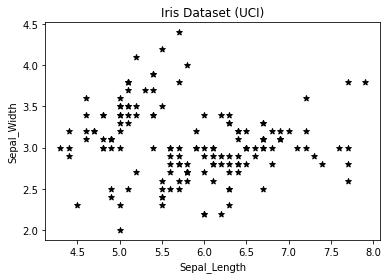

In [5]:
#matplotlib is useful for creating basic graphs such as line, bar, scatter, charts.
import matplotlib.pyplot as plt
%matplotlib inline
# let's create a figure and axis for subplots since we have different classes of iris
fix, ax = plt.subplots()

# scatter plot for sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'], marker='*', color='black')
# display the title and labels
ax.set_title('Iris Dataset (UCI)')
ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')




Text(0, 0.5, 'sepal_width')

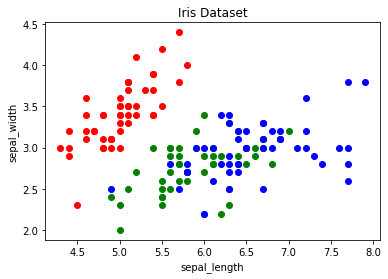

In [6]:
# this plot shows "ALL" the data but we know there are three different classes of iris
# let's add some coloring so that we know which one is which
# we can use dict datatype to define color scheme for each class
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i], color=colors[iris['class'][i]])

# set a title and label
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')



In [15]:
# let's now try the line chart
# *--*--* (line segment between 2 data points (use plot)
# get the y data points to plot
# iris.columns has those labels
columns = iris.columns.drop(['class']) # ignore the class for now

# create x data points
x_data = range(0, iris.shape[0]) # [0] -> row (refer to dataframe.shape)

# create figure and axis
fig, ax = plt.subplots()
#- fig, ax = plt.subplots(nrows=2, ncols=1)

# plot each column
plt.subplot(2, 1, 1)
for column in columns:    
    plt.plot(x_data, iris[column], label=column)

plt.subplot(2, 1, 2)
for column in columns:    
    avgdata = iris[column].rolling(window = 10).mean()
    plt.plot(x_data, avgdata, label=column)

# set title and legend
ax.set_title('Iris Dataset')
ax.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

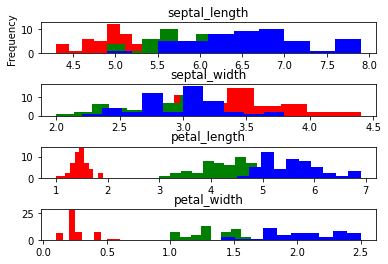

In [8]:
fix, ax = plt.subplots(4)
features = {0:'septal_length', 1:'septal_width', 2:'petal_length', 3:'petal_width'}

for i in range(0, len(iris.columns) - 1):
    hist_data = iris[iris['class'] == 'Iris-setosa']
    ax[i].hist(hist_data[columns[i]], color=colors['Iris-setosa'])

    hist_data = iris[iris['class'] == 'Iris-versicolor']
    ax[i].hist(hist_data[columns[i]], color=colors['Iris-versicolor'])

    hist_data = iris[iris['class'] == 'Iris-virginica']
    ax[i].hist(hist_data[columns[i]], color=colors['Iris-virginica'])
    ax[i].set_title(features[i])
    
# set a title and label
ax[0].set_ylabel('Frequency')
plt.subplots_adjust(hspace=1)


(-0.5, 3.5)

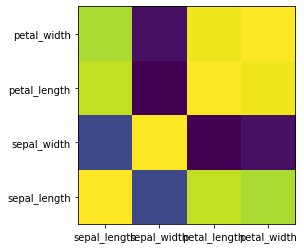

In [12]:
import numpy as np
import pandas as pd
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()

# create a heatmap
im = ax.imshow(corr.values)

# setting up the labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
ax.set_ylim(-0.5, 3.5)
ax.set_xlim(-0.5, 3.5)
# purple -> negative correlation
# green -> positive correlation